In [2]:
from keras.models import Model, Sequential
from keras.layers import Dense, Input, Activation, Dropout, BatchNormalization
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [ ]:
### Functional model
# inputs = Input(shape=(4,))
# x = Dense(6, activation='relu')(inputs)
# x = Dense(6, activation='relu')(x)
# outputs = Dense(3, activation='softmax')(x)

In [ ]:
#Sequential model
model = Sequential()
model.add(Dense(16, activation='relu', input_shape = (4,)))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
model.fit(X_train, y_train, epochs=1000, verbose=0)

In [ ]:
model.history.history.get('acc')[-1]

In [ ]:
plt.plot(model.history.history.get('acc'),'g')

In [ ]:
plt.plot(model.history.history.get('loss'),'r')

In [ ]:
pred = model.predict(X_test)
pred2 = np.argmax(pred, axis=1)

In [ ]:
accuracy_score(pred2, y_test)

# Running it with Grid Search

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
def build_classifier(optimizer):
    model = Sequential()
    
    model.add(Dense(16, activation='relu', input_shape = (4,)))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(3, activation='softmax'))
    
    model.compile(optimizer=optimizer, 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

In [ ]:
classifier = KerasClassifier(build_fn = build_classifier)

In [ ]:
parameters = {'batch_size':[1,5],
              'epochs':[100,200], 
              'optimizer':['adam', 'rmsprop']}
parameters

In [ ]:
grid_search = GridSearchCV(estimator=classifier, 
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=3)

In [ ]:
grid_search = grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_estimator_

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [ ]:
pred = grid_search.predict(X_test)
#pred2 = np.argmax(pred, axis=1)

In [ ]:
accuracy_score(pred, y_test)

# LSTM

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv('job_skills.csv')

In [5]:
df.shape

(1250, 7)

In [6]:
df1 = df.drop(['Company', 'Location', 'Category'], axis=1)

In [7]:
y = df['Category']

In [8]:
def concatenate(row):
    return ' '.join([str(i) for i in row])

In [9]:
df1['combined'] = [concatenate(list(df1.iloc[i])) for i in range(len(df1))]

In [10]:
X = df1['combined']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)

In [12]:
[len(i) for i in [X_train, X_test, y_train, y_test]]

[1000, 250, 1000, 250]

In [13]:
cnt = CountVectorizer(stop_words='english')

In [14]:
features = cnt.fit_transform(X_train)

In [15]:
features.shape

(1000, 4959)

In [16]:
lbl = LabelEncoder()
encoded_labels = lbl.fit_transform(y_train)

In [17]:
len(np.unique(encoded_labels))

23

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM

In [19]:
max_features = features.shape[1]
max_features

4959

In [20]:
model = Sequential()
model.add(Embedding(max_features, output_dim=128))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(23, activation='sigmoid'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         634752    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 23)                1495      
Total params: 685,655
Trainable params: 685,655
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(features, 
          encoded_labels, 
          epochs=1, 
          batch_size=100)

Epoch 1/1
1000/1000 [==============================] - 336s 336ms/step - loss: 3.1184 - acc: 0.0770


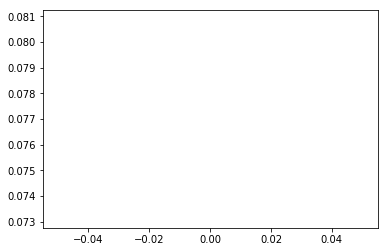

In [23]:
plt.plot(model.history.history.get('acc'))